# Trade

In this example we will introduce trade between two regions. Often, there exists trade between countries, regions within countries or between regions of countries (e.g. Latin America). This could be the trading of commodities such as gas or electricity in the form of imports and exports. MUSE is able to model this trade between regions to add further realism.

To keep this example straightforward we will start from the case study created in the [add a region](add-region.ipynb) tutorial. This can be downloaded [here](https://github.com/SGIModel/MUSE_OS/tree/main/docs/tutorial-code/3-add-region).

## File changes

The major file changes required to implement trade occur in the `technodata` folder. Specifically, within the sector folders such as `technodata/power/` or `technodata/gas/`. In addition, we will need to create a new agent file and modify the TOML file. For this example we will only modify the `power` sector. Note that any sector can trade (apart from a preset sector), but not all sectors have to trade if you don't want them to. 

No changes are required for the files in the `input/` folder. We also do not need to have the same number of agents for trading, as for the sectors.

## TradeTechnodata file

The first file we must create within the `technodata/power/` folder will be the `TradeTechnodata.csv` file. This file effectively details the technodata parameters between regions. For instance, we can detail how much `R2` has to pay for `R1`'s gas or electricity in terms of `cap_par`, `fix_par` or otherwise. This also extends to other technoeconomic data, for instance `MaxCapacityGrowth` or `TotalCapacityLimit`. These inputs are the same used as in the no-trade case. The only difference being that the value refers to each of the regions.

For this example, we will create a csv file with the following headers:

|ProcessName|RegionName|Parameter|Unit|R1|R2|
|-|-|-|-|-|-|
|gasCCGT|R1|cap_par|MUSD/PJ|18.29|56.58|

We can see that the technology and regions, similarly to the Technodata file are defined by the `ProcessName` and `RegionName` headers. In fact, the `TradeTechnodata.csv` follows the same naming convention as the `technodata.csv` file. The difference being that the `Parameter` column is long, as opposed to wide. Therefore, we define the parameters that we wish to assign in the rows rather than the columns. Next, we define the unit of interest in the `Unit` column followed by the regions `R1` and `R2`. 

As you may have noticed, we have three seperate places where we enter regions for only two total regions. This may be a bit confusing, but essentially, we have to define the costs that each region has to pay for a technology based in `RegionName`. In this example, for a gas power plant located in region `R1`, `R1` has to pay a `cap_par` of 18.29, whereas `R2` has to pay a higher fee of 56.58. This could be because of additional connection or pipeline costs.

To fully populate the TradeTechnodata file we have to define the following parameters for each region and technology:
- `cap_par`
- `fix_par`
- `MaxCapacityAddition`
- `MaxCapacityGrowth`
- `TotalCapacityLimit`

We must also delete these columns from the `Technodata.csv` file, otherwise we will receive an error.

To keep things simple we will just present the `cap_par` and `TotalCapacityLimit` parameters here, but in your example you should add numbers for the remaining parameters. The full case study is available at the end of this tutorial.

|ProcessName|RegionName|Time|Parameter|Unit|R1|R2|
|-|-|-|-|-|-|-|
|gasCCGT|R1|2020|cap_par|MUSD/PJ|18.29|56.58|
|windturbine|R1|2020|cap_par|MUSD/PJ|33.2|40|
|solarPV|R1|2020|cap_par|MUSD/PJ|33.2|40|
|gasCCGT|R2|2020|cap_par|MUSD/PJ|47.08|28.54|
|windturbine|R2|2020|cap_par|MUSD/PJ|30|43.57|
|solarPV|R2|2020|cap_par|MUSD/PJ|30|43.57|
|...|...|...|...|...|...|...|
|gasCCGT|R1|2040|TotalCapacityLimit|PJ/y|40000|40000|
|windturbine|R1|2040|TotalCapacityLimit|PJ/y|40000|40000|
|solarPV|R1|2040|TotalCapacityLimit|PJ/y|40000|40000|
|gasCCGT|R2|2040|TotalCapacityLimit|PJ/y|40000|40000|
|windturbine|R2|2040|TotalCapacityLimit|PJ/y|40000|40000|
|solarPV|R2|2040|TotalCapacityLimit|PJ/y|40000|40000|



## ExistingTrade file

The `ExistingCapacity.csv` file that was used in the non-trade cases can't specify how much existing trade there exists between regions. Therefore, the `ExistingCapacity.csv` has to be repurposed into a new input called `ExistingTrade.csv` which is able to define existing trade flows as well as existing capacity.

This input is in long form, in a similar fashion to `TradeTechnodata.csv`. A quick example is shown below:

|ProcessName|RegionName|Time|R1|R2|
|-|-|-|-|-|
|Unit|-|Year|PJ/y|PJ/y|
|gasCCGT|R1|2010|300|0|
|gasCCGT|R1|2020|240|0|

In this example we have `ProcessName`, `RegionName`, `Time` and regions `R1` and `R2`. The first three follow a similar approachto the `TradeTechnodata.csv` and so the names should be consistent. The column `R1` states the existing capacity of a technology in a region in a particular year, whereas the column `R2` details the amount of existing trade that there is from `R1` to `R2` in `gasCCGT`.

The amount of rows depends on the number of milestone years, technologies and regions and can get quite long. For this example, we show just the `ExistingTrade.csv` for `gasCCGT`, but you should fill out the existing trade for `windturbine` and `solarPV`. Again, we provide a link to the full files at the end of this tutorial.

|ProcessName|RegionName|Time|R1|R2|
|-|-|-|-|-|
|Unit|-|Year|PJ/y|PJ/y|
|gasCCGT|R1|2010|20|0|
|gasCCGT|R1|2020|20|0|
|gasCCGT|R2|2010|0|20|
|gasCCGT|R2|2020|0|20|
|gasCCGT|R1|2025|10|0|
|gasCCGT|R2|2025|0|10|
|gasCCGT|R1|2030|5|0|
|gasCCGT|R2|2030|0|5|
|gasCCGT|R1|2035|0|0|
|gasCCGT|R2|2035|0|0|
|gasCCGT|R1|2040|0|0|
|gasCCGT|R2|2040|0|0|
|gasCCGT|R1|2045|0|0|
|gasCCGT|R2|2045|0|0|
|gasCCGT|R1|2050|0|0|
|gasCCGT|R2|2050|0|0|
|...|...|...|...|...|

Once this file has been created, we can delete the original `ExistingCapacity.csv` file.

## Agent file

The agent file requires some changes to run successfully. The same objective metric must be used for each region and there is no need for the new and retrofit agents.

We define the `AgentShare` column as `agent_share` and give them a `default` `Type`. We msut also define the objective as `ALCOE` and the `SearchRule` as `from_assets->compress->reduce_assets`. The rest of the data can stay the same as per the previous tutorials. 

|AgentShare|Name|RegionName|Objective1|...|SearchRule|...|Budget|Type|
|-|-|-|-|-|-|-|-|-|
|agent_share|A1|R1|ALCOE|...|from_assets->compress->reduce_assets|...|inf|default|
|agent_share|A2|R1|ALCOE|...|from_assets->compress->reduce_assets|...|inf|default|
|agent_share|A1|R2|ALCOE|...|from_assets->compress->reduce_assets|...|inf|default|
|agent_share|A2|R2|ALCOE|...|from_assets->compress->reduce_assets|...|inf|default|


Save the agent file for the power sector in the `technodata/power/` directory, but make sure to keep the generalised `Agents.csv` in the `technodata/` directory for the other sectors. This is as we aren't including trade in the other sectors.

## Technodata

The technodata file remains largely untouched, apart from a removal of the rows which contain parameters which are defined in the `TradeTechnodata.csv` file, for example `cap_par` and `TotalCapacityLimit`. In addition, we have to amend the `AgentShare` column and replace the final `Agent2` column with the name `AgentShare` so that it matches with the `Agents.csv` file.



|ProcessName|RegionName|Time|Level|cap_exp|fix_exp|var_par|var_exp|...|AgentShare|
|-|-|-|-|-|-|-|-|-|-|
|Unit|-|Year|-|-|-|MUS$2010/PJ|-|...|
|gasCCGT|R1|2020|fixed|1|1|0|1|...|**0.5**|
|gasCCGT|R1|2040|fixed|1|1|0|1|...|**0.5**|
|...|...|...|...|...|...|...|...|...|...|
|gasCCGT|R2|2020|fixed|1|1|0|1|...|**0.5**|
|gasCCGT|R2|2040|fixed|1|1|0|1|...|**0.5**|

## TOML

Finally, we must make a few changes in the TOML file to tell the model that we want to run trade in the model as well as the new `TradeTechnodata.csv` and `ExistingTrade.csv`

We will only be making changes in the power sector in this example.

The `[sectors.power]` section can stay the same. However, within the `[sectors.power.technodata]` of the TOML we need to link to the trade file, shown in the second input below:
```
[sectors.power.technodata]
technodata = '{path}/technodata/power/Technodata.csv'
trade = '{path}/technodata/power/TradeTechnodata.csv'
commodities_in = '{path}/technodata/power/CommIn.csv'
commodities_out = '{path}/technodata/power/CommOut.csv'
```

Next, we have to edit the section heading from `[sectors.power.subsectors.retro_and_new]` to `[sectors.power.subsectors.trade]` to define that we want to include trade. Secondly, we need to link to the new agents file that we saved in the `technodata/power/` folder. So this just requires the addition of the `power/` directory. Then we have to change the `existing_capacity` to the new `ExistingTrade.csv` file that we created. Finally, we have to link the new agents file. We must ensure that we use the `scipy` solver for this. The changes required can be seen below:
```
[sectors.power.subsectors.trade]
agents = '{path}/technodata/power/Agents.csv'
existing_capacity = '{path}/technodata/power/ExistingTrade.csv'
lpsolver = "scipy"
demand_share = "unmet_forecasted_demand"
```

We must also ensure that the agents' objectives are consistent across agents' regions. The scipy solver optimises trade flows amongst the agents in each region, therefore, they need to use the same objective. 

We can then run the model, as before, with:
```
python -m muse settings.toml
```

## Visualisation of results

Next we can visualise the results in a similar fashion to before.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
capacity = pd.read_csv("../tutorial-code/8-trade/final_trade/Results/MCACapacity.csv")

Region = R1


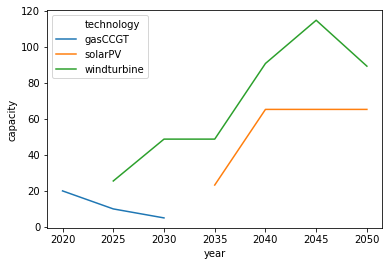

Region = R2


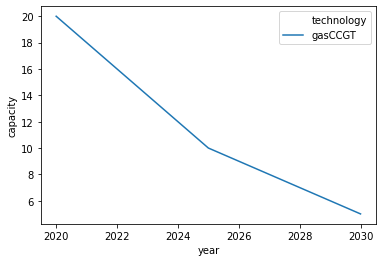

In [3]:
capacity_grouped = capacity.groupby(["region", "sector", "technology", "year"]).sum().reset_index()

for region, data in capacity_grouped[capacity_grouped.sector=="power"].groupby("region"):
    print("Region = {}".format(region))
    sns.lineplot(data=data, x="year", y="capacity", hue="technology")
    plt.show()
    plt.close()


We see that region `R1` has prioritised `solarPV` and `windturbine`, whereas region `R2` hasn't investing in anything. This is because of the lower costs of technologies in `R1`. This means that it is more economical for `R2` to import from `R1` than to create its own supply.

## End of tutorials
That brings us to the end of the tutorial. The full finished files can be found at [here](https://github.com/SGIModel/MUSE_OS/tree/main/docs/tutorial-code/8-trade/final_trade).